In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import math

In [3]:
data2003 = pd.read_csv("Downloads/2003.csv")
data2004 = pd.read_csv("Downloads/2004.csv")
data2005 = pd.read_csv("Downloads/2005.csv")
data2006 = pd.read_csv("Downloads/2006.csv")
data2007 = pd.read_csv("Downloads/2007.csv")
data2008 = pd.read_csv("Downloads/2008.csv")

/Users/leva94/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data = pd.concat([data2003, data2004, data2005, data2006, data2007, data2008])

In [5]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
data["UniqueCarrier"].value_counts()

WN    6454950
AA    4006697
DL    3440463
OO    3090853
MQ    3025493
UA    3025212
US    2701364
NW    2682336
XE    2350309
CO    1829727
EV    1697172
OH    1464176
FL    1265138
AS     957377
YV     854056
B6     811341
DH     693047
HP     583311
9E     521059
F9     336958
HA     274265
TZ     208420
AQ      89547
Name: UniqueCarrier, dtype: int64

In [171]:
data_work = data.loc[data["UniqueCarrier"] == "CO"][["Origin", "Dest"]]

In [172]:
data_work["Flight"] = data_work["Origin"] + data_work["Dest"]

In [173]:
final = data_work["Flight"].value_counts()

In [174]:
final.to_csv("continental.csv", sep=',', encoding='utf-8')

In [175]:
final

BOSEWR    22751
EWRBOS    22348
IAHLAX    21956
EWRIAH    21787
MSYIAH    21767
IAHMSY    21754
LAXIAH    21726
IAHEWR    21198
IAHSAT    21069
SATIAH    21066
IAHAUS    20782
AUSIAH    20771
EWRMCO    19437
MCOEWR    19433
LGAIAH    19358
IAHLGA    19308
FLLEWR    16858
EWRFLL    16825
IAHDCA    16180
DCAIAH    16156
EWRATL    15382
ATLEWR    15349
IAHLAS    15281
IAHORD    15206
LASIAH    15135
ORDIAH    15105
DENIAH    15099
ORDEWR    14982
IAHDEN    14973
EWRORD    14881
          ...  
IAHCVG        1
SJCSAN        1
ORDCLE        1
SEAPDX        1
CLEMKE        1
MIAIND        1
LAXCMH        1
SEAMSY        1
SDFBOS        1
BHMEWR        1
LAXSDF        1
MDWCLE        1
PHLJAX        1
BWIEWR        1
LAXIND        1
SJCSFO        1
LBBIAH        1
SFOSAN        1
IAHCHS        1
SDFSMF        1
BOSSDF        1
EWRPHL        1
MSYSEA        1
SNACLE        1
MKECLE        1
INDLAX        1
MKEMDW        1
ORDMDW        1
LGAJAX        1
MSYCMH        1
Name: Flight, Length: 45

In [3]:
data_short = pd.read_csv("northwest.csv", sep=",", names=["Flight", "Quantity"])

In [4]:
data_short

,Flight,Quantity
0,MSPDTW,33539
1,DTWMSP,31723
2,MSPORD,20303
3,ORDMSP,19935
4,DTWLGA,18504
5,LGADTW,18496
6,DTWDCA,17922
7,ORDDTW,17776
8,DCADTW,17683
9,DTWORD,17474


In [5]:
data_short["ORIGIN"] = data_short["Flight"].apply(lambda x: x[0:3])
data_short["DESTINATION"] = data_short["Flight"].apply(lambda x: x[3:6])

In [6]:
data_short

,Flight,Quantity,ORIGIN,DESTINATION
0,MSPDTW,33539,MSP,DTW
1,DTWMSP,31723,DTW,MSP
2,MSPORD,20303,MSP,ORD
3,ORDMSP,19935,ORD,MSP
4,DTWLGA,18504,DTW,LGA
5,LGADTW,18496,LGA,DTW
6,DTWDCA,17922,DTW,DCA
7,ORDDTW,17776,ORD,DTW
8,DCADTW,17683,DCA,DTW
9,DTWORD,17474,DTW,ORD


In [7]:
air_info = data_short.groupby("ORIGIN")["Quantity"].sum() + data_short.groupby("DESTINATION")["Quantity"].sum()

In [8]:
air_info

ORIGIN
ABE     3895
ABQ     8569
ALB    14400
ANC    12829
ATL    57208
AUS    11872
AZO     6924
BDL    29612
BHM    10485
BIL    12944
BIS    13907
BNA    43447
BOI    10068
BOS    55658
BTR     5826
BTV      706
BUF    25386
BWI    44944
BZN    10709
CHS       78
CID     3722
CLE    23738
CLT    27567
CMH    35959
COS     8369
CVG     2710
DAY       84
DCA    77948
DEN    50320
DFW    46167
       ...  
RAP    11256
RDU    30556
RIC     5623
RNO     4121
ROC    10640
RST     6326
RSW    25979
SAN    25824
SAT    26520
SAV      708
SBN      296
SDF    18215
SEA    57218
SFO    44774
SGF     2120
SJC    10451
SJU     2642
SLC    14968
SMF    10250
SNA    14848
SRQ     2736
STL    42598
STT       66
SYR    15452
TPA    47037
TUS     5137
TVC     9808
TYS      150
VPS    12910
XNA     1972
Name: Quantity, Length: 128, dtype: int64

In [9]:
air_info.nlargest(100)

ORIGIN
MSP    1199984
DTW    1171701
MEM     354852
IND      88063
ORD      87302
LGA      82398
DCA      77948
LAX      76820
MKE      74119
MCO      72990
LAS      60213
SEA      57218
ATL      57208
BOS      55658
EWR      55094
PHL      54644
MCI      54219
GRR      50534
DEN      50320
PHX      48917
TPA      47037
DFW      46167
BWI      44944
SFO      44774
BNA      43447
STL      42598
IAH      40457
MDW      40297
MSN      38803
CMH      35959
        ...   
RAP      11256
GTF      11097
GFK      10712
BZN      10709
ROC      10640
BHM      10485
SJC      10451
GEG      10350
SMF      10250
BOI      10068
TVC       9808
ABQ       8569
COS       8369
PBI       7705
MSO       7320
MDT       7115
FCA       6973
AZO       6924
RST       6326
BTR       5826
GPT       5759
LSE       5651
RIC       5623
GSP       5507
GSO       5470
TUS       5137
OGG       4824
DSM       4704
ONT       4394
RNO       4121
Name: Quantity, Length: 100, dtype: int64

In [10]:
largest_airports = air_info.nlargest(100).index

In [11]:
largest_airports

Index(['MSP', 'DTW', 'MEM', 'IND', 'ORD', 'LGA', 'DCA', 'LAX', 'MKE', 'MCO',
       'LAS', 'SEA', 'ATL', 'BOS', 'EWR', 'PHL', 'MCI', 'GRR', 'DEN', 'PHX',
       'TPA', 'DFW', 'BWI', 'SFO', 'BNA', 'STL', 'IAH', 'MDW', 'MSN', 'CMH',
       'RDU', 'BDL', 'FLL', 'IAD', 'MSY', 'GRB', 'CLT', 'SAT', 'RSW', 'SAN',
       'BUF', 'PDX', 'MIA', 'HNL', 'OMA', 'CLE', 'FNT', 'MBS', 'LAN', 'FAR',
       'PVD', 'PIT', 'JFK', 'SDF', 'FSD', 'MHT', 'JAX', 'SYR', 'ORF', 'SLC',
       'SNA', 'ALB', 'BIS', 'DLH', 'MOT', 'BIL', 'VPS', 'ANC', 'LIT', 'AUS',
       'RAP', 'GTF', 'GFK', 'BZN', 'ROC', 'BHM', 'SJC', 'GEG', 'SMF', 'BOI',
       'TVC', 'ABQ', 'COS', 'PBI', 'MSO', 'MDT', 'FCA', 'AZO', 'RST', 'BTR',
       'GPT', 'LSE', 'RIC', 'GSP', 'GSO', 'TUS', 'OGG', 'DSM', 'ONT', 'RNO'],
      dtype='object', name='ORIGIN')

In [16]:
matrix = pd.DataFrame(0, index=largest_airports, columns=largest_airports)

In [17]:
for i in range(595):
    if data_short["ORIGIN"][i] in list(largest_airports):
        if data_short["DESTINATION"][i] in list(largest_airports):
            matrix[data_short["ORIGIN"][i]][data_short["DESTINATION"][i]] += data_short["Quantity"][i]
            matrix[data_short["DESTINATION"][i]][data_short["ORIGIN"][i]] += data_short["Quantity"][i]

In [18]:
class Graph:
    def __init__(self, incidence_matrix):
        self.incidence_matrix = pd.DataFrame(np.array(incidence_matrix), 
                                             index=incidence_matrix.index, columns=incidence_matrix.columns)
        self.prec = pd.Series("", index=incidence_matrix.index)
        self.time_in = pd.Series(-1, index=incidence_matrix.index)
        succlist = []
        for i in incidence_matrix.index:
            succlist.append([])
        self.succ = pd.Series(succlist, index=incidence_matrix.index)
        self.ret = pd.Series(-1, index=incidence_matrix.index)
        self.tight_component = pd.Series(-1, index=incidence_matrix.index)
        self.cur_time = -1
        self.bridges = []
        self.most_popular_dests = []
        
    def reinit(self):
        self.prec = pd.Series("", index=self.incidence_matrix.index)
        self.time_in = pd.Series(-1, index=self.incidence_matrix.index)
        succlist = []
        for i in self.incidence_matrix.index:
            succlist.append([])
        self.succ = pd.Series(succlist, index=self.incidence_matrix.index)
        self.ret = pd.Series(-1, index=self.incidence_matrix.index)
        self.tight_component = pd.Series(-1, index=self.incidence_matrix.index)
        self.cur_time = -1
        self.bridges = []
        
    def find_popular_dests(self):
        the_matrix = pd.DataFrame(np.array(self.incidence_matrix), 
                                    index=self.incidence_matrix.index, columns=self.incidence_matrix.columns)
        maxx = 200000
        list_of_dests = []
        while (maxx > 10000):
            max_origin = the_matrix.max().idxmax()
            max_dest = the_matrix[max_origin].idxmax()
            maxx = the_matrix[max_origin][max_dest]
            the_matrix[max_origin][max_dest] = -maxx
            the_matrix[max_dest][max_origin] = -maxx
            list_of_dests.append([max_origin, max_dest, maxx])
        graph.most_popular_dests = pd.DataFrame(list_of_dests)
        return pd.DataFrame(list_of_dests)
        
    def dfs(self, min_flights, airport):
        for dest in self.incidence_matrix.index:
            if (self.incidence_matrix[airport][dest] >= min_flights):
                if (self.prec[dest] == ""):
                    self.cur_time += 1
                    self.time_in[dest] = self.cur_time
                    self.ret[dest] = self.cur_time
                    self.prec[dest] = airport
                    self.succ[airport].append(dest)
                    self.dfs(min_flights, dest)
        
    def BIG_DFS(self, min_flights):
        for ap in self.incidence_matrix.index:
            if (self.prec[ap] == ""):
                self.prec[ap] = ap
                self.cur_time += 1
                self.time_in[ap] = self.cur_time
                self.ret[ap] = self.cur_time
                self.dfs(min_flights, ap)
        return self.time_in
    
    def count_return(self, ap, min_flights):
        for dest in self.succ[ap]:
            self.count_return(dest, min_flights)
            if (self.ret[dest] < self.ret[ap]):
                self.ret[ap] = self.ret[dest]
        for dest in self.incidence_matrix.index:
            if (self.incidence_matrix[dest][ap] >= min_flights):
                if (dest != self.prec[ap]):
                    if (self.time_in[dest] < self.ret[ap]):
                        self.ret[ap] = self.time_in[dest]
                    
    def COUNT_RETURNS(self, min_flights):
        for airport in self.incidence_matrix.index:
            if (self.prec[airport] == airport):
                self.count_return(airport, min_flights)
    
    def find_tight_component(self, vertex, marker):
        self.tight_component[vertex] = marker
        for dest in self.succ[vertex]:
            if (self.ret[dest] > self.time_in[vertex]):
                self.prec[dest] = dest
                self.bridges.append([vertex, dest])
            else:
                self.find_tight_component(dest, marker)
    
    def TIGHT_COMPONENTS_SPLIT(self, min_flights):
        self.BIG_DFS(min_flights)
        self.COUNT_RETURNS(min_flights)
        marker = -1
        while ((self.tight_component == -1).any()):
            for city in self.incidence_matrix.index:
                if (self.tight_component[city] == -1):
                    if (self.prec[city] == city):
                        marker +=1
                        self.find_tight_component(city, marker)
        return self.tight_component
    
    def GAMMA_ALGORITHM(self, min_flights, component_marker):
        list_of_cities = []
        for city in self.incidence_matrix.index:
            if (self.tight_component[city] == component_marker):
                list_of_cities.append(city)
        if (len(list_of_cities) < 2):
            return True
        component_matrix = self.incidence_matrix[list_of_cities].loc[list_of_cities]
        component_matrix = (component_matrix >= min_flights)
        written_cities = pd.Series(False, index=list_of_cities)
        stack_of_cities = []
        stack_of_cities.append(list_of_cities[0])
        while (len(stack_of_cities) < len(list_of_cities) + 1):
            for city in list_of_cities:
                if (component_matrix[city][stack_of_cities[-1]]):
                    if (len(stack_of_cities) == 1):
                        stack_of_cities.append(city)
                    else:
                        if (city != stack_of_cities[-2]):
                            stack_of_cities.append(city)
        begin = -1
        end = len(stack_of_cities)
        for i in range(len(stack_of_cities)):
            for j in range(i+1, end, 1):
                if (stack_of_cities[i] == stack_of_cities[j]):
                    if (j < end):
                        begin = i
                        end = j
        list_of_faces = []
        face = []
        for i in range(begin, end):
            face.append(stack_of_cities[i])
            component_matrix[stack_of_cities[i]][stack_of_cities[i+1]] = False
            component_matrix[stack_of_cities[i+1]][stack_of_cities[i]] = False
            written_cities[stack_of_cities[i]] = True
        list_of_faces.append(face)
        list_of_faces.append(face)
        while (component_matrix.any().any()):
            set_of_segments = []
            interior_matrix = component_matrix.loc[written_cities, written_cities]
            if (interior_matrix.any().any()):
                for city in interior_matrix.index:
                    for dest in interior_matrix.index:
                        if (interior_matrix[city][dest] & (city > dest)):
                            set_of_vertices = set([])
                            set_of_adjacent = set([city, dest])
                            faces_to_add = []
                            gamma = 0
                            for i in range(len(list_of_faces)):
                                if set_of_adjacent.issubset(set(list_of_faces[i])):
                                    gamma +=1
                                    faces_to_add.append(i)
                            set_of_segments.append((set_of_vertices, set_of_adjacent, gamma, faces_to_add))
            if (not (written_cities.all())):
                rest_matrix = component_matrix.loc[-written_cities, -written_cities]
                segment_markers = pd.Series(-1, index=rest_matrix.index)
                marker = 0
                segment_markers[rest_matrix.index[0]] = 0
                while ((segment_markers == -1).any()):
                    if (rest_matrix.loc[segment_markers == marker, segment_markers != marker].any().any()):
                        for city in segment_markers.index:
                            if (segment_markers[city] == marker):
                                for dest in segment_markers.index:
                                    if (rest_matrix[city][dest]):
                                        segment_markers[dest] = marker
                    else:
                        marker +=1
                        control = True
                        for city in segment_markers.index:
                            if (segment_markers[city] == -1):
                                if (control):
                                    segment_markers[city] = marker
                                    control = False
                for i in range(marker+1):
                    set_of_vertices = set([])
                    set_of_adjacent = set([])
                    for city in segment_markers.index:
                        if (segment_markers[city] == i):
                            set_of_vertices.add(city)
                            for dest in interior_matrix.index:
                                if component_matrix[city][dest]:
                                    set_of_adjacent.add(dest)
                    faces_to_add = []
                    gamma = 0
                    for i in range(len(list_of_faces)):
                        if set_of_adjacent.issubset(set(list_of_faces[i])):
                            gamma +=1
                            faces_to_add.append(i)
                    set_of_segments.append((set_of_vertices, set_of_adjacent, gamma, faces_to_add))
            min_segment = (set([]), set([]), 100 * len(component_matrix.index), [])
            for segment in set_of_segments:
                if (segment[2] < min_segment[2]):
                    min_segment = segment
            if (min_segment[2] == 0):
                return False
            list_of_adjacent = list(min_segment[1])
            if (len(list_of_adjacent) == 1):
                first_vertex = ""
                second_vertex = ""
                for city in min_segment[0]:
                    if (component_matrix[list_of_adjacent[0]][city]):
                        if (first_vertex == ""):
                            first_vertex = city
                        else:
                            if (second_vertex == ""):
                                second_vertex = city
                component_matrix[list_of_adjacent[0]][first_vertex] = False
                component_matrix[first_vertex][list_of_adjacent[0]] = False
                component_matrix[list_of_adjacent[0]][second_vertex] = False
                component_matrix[second_vertex][list_of_adjacent[0]] = False
                visited = pd.Series(False, index=min_segment[0])
                visited[first_vertex] = True
                stack_of_vertices = [first_vertex]
                path = []
                while (len(stack_of_vertices) > 0):
                    current = stack_of_vertices[-1]
                    if (current == second_vertex):
                        path = list(stack_of_vertices)
                    for dest in min_segment[0]:
                        if (current == stack_of_vertices[-1]):
                            if (component_matrix[current][dest]):
                                if (not visited[dest]):
                                    stack_of_vertices.append(dest)
                                    visited[dest] = True
                    if (current == stack_of_vertices[-1]):
                        stack_of_vertices.pop()
                for i in range(len(path) - 1):
                    component_matrix[path[i]][path[i+1]] = False
                    component_matrix[path[i+1]][path[i]] = False
                for i in range(len(path)):
                    written_cities[path[i]] = True
                path.append(list_of_adjacent[0])
                Face = list(list_of_faces[min_segment[3][0]])
                index = Face.index(list_of_adjacent[0]) + 1
                list_of_faces[min_segment[3][0]] = Face[:index]
                list_of_faces[min_segment[3][0]].extend(path)
                list_of_faces[min_segment[3][0]].extend(Face[index:])
                list_of_faces.append(path)
            else:
                path = []
                list_of_adjacent = list(min_segment[1])
                if (len(min_segment[0]) != 0):
                    first_vertex = ""
                    second_vertex = ""
                    for city in min_segment[0]:
                        if (component_matrix[list_of_adjacent[0]][city]):
                            if (first_vertex == ""):
                                first_vertex = city
                        if (component_matrix[list_of_adjacent[1]][city]):
                            if (second_vertex == ""):
                                second_vertex = city
                    component_matrix[list_of_adjacent[0]][first_vertex] = False
                    component_matrix[first_vertex][list_of_adjacent[0]] = False
                    component_matrix[list_of_adjacent[1]][second_vertex] = False
                    component_matrix[second_vertex][list_of_adjacent[1]] = False
                    visited = pd.Series(False, index=min_segment[0])
                    visited[first_vertex] = True
                    stack_of_vertices = [first_vertex]
                    while (len(stack_of_vertices) > 0):
                        current = stack_of_vertices[-1]
                        if (current == second_vertex):
                            path = list(stack_of_vertices)
                        for dest in min_segment[0]:
                            if (current == stack_of_vertices[-1]):
                                if (component_matrix[current][dest]):
                                    if (not visited[dest]):
                                        stack_of_vertices.append(dest)
                                        visited[dest] = True
                        if (current == stack_of_vertices[-1]):
                            stack_of_vertices.pop()
                        for i in range(len(path) - 1):
                            component_matrix[path[i]][path[i+1]] = False
                            component_matrix[path[i+1]][path[i]] = False
                        for i in range(len(path)):
                            written_cities[path[i]] = True
                else:
                    component_matrix[list_of_adjacent[0]][list_of_adjacent[1]] = False
                    component_matrix[list_of_adjacent[1]][list_of_adjacent[0]] = False
                reverse_path = list(path)
                reverse_path.reverse()
                Face = list(list_of_faces[min_segment[3][0]])
                first_index = Face.index(list_of_adjacent[0])
                second_index = Face.index(list_of_adjacent[1])
                if (first_index < second_index):
                    list_of_faces[min_segment[3][0]] = Face[first_index : second_index + 1]
                    list_of_faces[min_segment[3][0]].extend(reverse_path)
                    new_face = Face[: first_index + 1]
                    new_face.extend(path)
                    new_face.extend(Face[second_index :])
                else:
                    list_of_faces[min_segment[3][0]] = Face[second_index : first_index + 1]
                    list_of_faces[min_segment[3][0]].extend(path)
                    new_face = Face[: second_index + 1]
                    new_face.extend(reverse_path)
                    new_face.extend(Face[first_index :])
                list_of_faces.append(new_face)    
        return list_of_faces

In [19]:
graph = Graph(matrix)

In [20]:
graph.reinit()

In [21]:
graph.find_popular_dests()

,0,1,2
0,MSP,DTW,65262
1,MSP,ORD,40238
2,DTW,LGA,37000
3,DTW,DCA,35605
4,DTW,ORD,35250
5,DTW,BOS,31492
6,DTW,GRR,29743
7,DTW,PHL,29615
8,MSP,MEM,29494
9,DTW,IND,29277


In [22]:
for i in range(len(graph.most_popular_dests) - 1):
    print(i)
    graph.reinit()
    graph.TIGHT_COMPONENTS_SPLIT(graph.most_popular_dests[2][i])
    for j in range(100):
        if (graph.GAMMA_ALGORITHM(graph.most_popular_dests[2][i], j) == False):
            graph.incidence_matrix[graph.most_popular_dests[0][i]][graph.most_popular_dests[1][i]] = 0
            graph.incidence_matrix[graph.most_popular_dests[1][i]][graph.most_popular_dests[0][i]] = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114


In [57]:
graph.reinit()
graph.TIGHT_COMPONENTS_SPLIT(graph.most_popular_dests[2][len(graph.most_popular_dests) - 2])
target_split = graph.GAMMA_ALGORITHM(graph.most_popular_dests[2][len(graph.most_popular_dests) - 2], 0)

In [58]:
set_of_cities = set([])
for i in range(len(target_split)):
    for j in range(len(target_split[i])):
        set_of_cities.add(target_split[i][j])

In [59]:
target_matrix = graph.incidence_matrix.loc[set_of_cities, set_of_cities] >= 10000

In [60]:
for face in target_split:
    while (len(face) > 3):
        if (target_matrix[face[0]][face[2]]):
            target_matrix[face[1]][face[3]] = True
            target_matrix[face[3]][face[1]] = True
            target_split.append([face[1], face[2], face[3]])
            face.remove(face[2])
        else:
            target_matrix[face[0]][face[2]] = True
            target_matrix[face[2]][face[0]] = True
            target_split.append([face[1], face[2], face[0]])
            face.remove(face[1])

In [61]:
outer_face = frozenset(target_split[0])
number_of_faces = len(target_split[1:])
inner_faces = dict()
for face in target_split[1:]:
    inner_faces[frozenset(face)] = 1
secondary_cities = []
while ((target_matrix.sum().min() < 4) & (len(target_matrix) > 3)):
    rem_city = target_matrix.sum().idxmin()
    adjacent_cities = list(target_matrix[rem_city][target_matrix[rem_city]].index)
    faces_to_remove = []
    faces_to_remove.append(frozenset([adjacent_cities[0], adjacent_cities[1], rem_city]))
    faces_to_remove.append(frozenset([adjacent_cities[0], adjacent_cities[2], rem_city]))
    faces_to_remove.append(frozenset([adjacent_cities[1], adjacent_cities[2], rem_city]))
    weight_face = pd.Series(0, index=adjacent_cities)
    if (rem_city in outer_face):
        old_number = number_of_faces
        for face in faces_to_remove:
            if (face == outer_face):
                outer_face = frozenset(adjacent_cities)
                for city in adjacent_cities:
                    if (not (city in face)):
                        weight_face[city] = old_number
            else:
                for city in adjacent_cities:
                    if (not (city in face)):
                        weight = inner_faces.pop(face)
                        weight_face[city] = -weight
                        number_of_faces -= weight
    else:
        for face in faces_to_remove:
            for city in adjacent_cities:
                if (not (city in face)):
                    weight_face[city] = inner_faces.pop(face)
        inner_faces[frozenset(adjacent_cities)] = weight_face.sum()
    target_matrix = target_matrix.drop([rem_city], axis=0)
    target_matrix = target_matrix.drop([rem_city], axis=1)
    secondary_cities.append([rem_city, weight_face])

In [62]:
X = pd.Series(0, index=target_matrix.index, dtype=float)
Y = pd.Series(0, index=target_matrix.index, dtype=float)
X[list(outer_face)[1]] = 1
X[list(outer_face)[2]] = 2
Y[list(outer_face)[1]] = 2

In [63]:
def area(face, X, Y):
    return 0.5 * np.abs((X[face[1]] - X[face[0]]) * (Y[face[2]] - Y[face[0]]) - (X[face[2]] - X[face[0]]) * (Y[face[1]] - Y[face[0]]))

In [64]:
faces_to_move = list(inner_faces.keys())

In [65]:
weight = (1 / target_matrix.sum(1))
target_matrixx = target_matrix.drop(outer_face, axis=1)
for iterr in range(1000):
    if (iterr % 10 == 0):
        print(iterr)
        total_area = 0
        for face in faces_to_move:
            total_area += area(list(face), X, Y)
        print(total_area - 2.0)
    for city in target_matrixx.columns:
        X[city] = 0.2 * (X[target_matrixx[city]] * weight[target_matrixx[city]]).mean() / weight[target_matrixx[city]].mean() + 0.8 * X[city]
        Y[city] = 0.2 * (Y[target_matrixx[city]] * weight[target_matrixx[city]]).mean() / weight[target_matrixx[city]].mean() + 0.8 * Y[city]

0
0.0
10
0.0
20
0.0
30
0.0
40
0.0
50
0.0
60
0.0
70
0.0
80
0.0
90
0.0
100
0.0
110
0.0
120
0.0
130
0.0
140
0.0
150
0.0
160
0.0
170
0.0
180
0.0
190
0.0
200
0.0
210
0.0
220
0.0
230
0.0
240
0.0
250
0.0
260
0.0
270
0.0
280
0.0
290
0.0
300
0.0
310
0.0
320
0.0
330
0.0
340
0.0
350
0.0
360
0.0
370
0.0
380
0.0
390
0.0
400
0.0
410
0.0
420
0.0
430
0.0
440
0.0
450
0.0
460
0.0
470
0.0
480
0.0
490
0.0
500
0.0
510
0.0
520
0.0
530
0.0
540
0.0
550
0.0
560
0.0
570
0.0
580
0.0
590
0.0
600
0.0
610
0.0
620
0.0
630
0.0
640
0.0
650
0.0
660
0.0
670
0.0
680
0.0
690
0.0
700
0.0
710
0.0
720
0.0
730
0.0
740
0.0
750
0.0
760
0.0
770
0.0
780
0.0
790
0.0
800
0.0
810
0.0
820
0.0
830
0.0
840
0.0
850
0.0
860
0.0
870
0.0
880
0.0
890
0.0
900
0.0
910
0.0
920
0.0
930
0.0
940
0.0
950
0.0
960
0.0
970
0.0
980
0.0
990
0.0


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

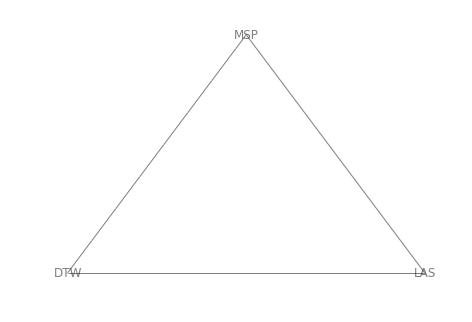

In [67]:
list_of_cities = list(set_of_cities)
list_from = []
list_to = []
for i in range(len(target_matrix.index)):
    for j in range(i + 1, len(target_matrix.index)):
        if (target_matrix.iloc[i, j]):
            list_from.append(target_matrix.index[i])
            list_to.append(target_matrix.index[j])
draw_df = pd.DataFrame({"from":list_from, "to":list_to})
NW = nx.from_pandas_dataframe(draw_df, "from", "to")
dic = {}
for i in target_matrix.index:
    dic[i] = (X[i], Y[i])
nx.draw(NW, pos=dic, with_labels=True, node_size=np.array(graph.incidence_matrix.loc[list(NW.nodes),
                                                                                     list(NW.nodes)].sum()**2 /3000000000),
        node_color="skyblue", node_shape="o", alpha=0.5)


In [68]:
inner_faces

{frozenset({'DTW', 'LAS', 'MSP'}): 17}

In [69]:
secondary_cities.reverse()

In [70]:
for el in secondary_cities:
    X[el[0]] = (X[el[1].index] * el[1]).sum() / el[1].sum()
    Y[el[0]] = (Y[el[1].index] * el[1]).sum() / el[1].sum()


In [71]:
def affine_normalize(target_split, X, Y):
    X = X - X[target_split[0][0]]
    Y = Y - Y[target_split[0][0]]
    det = Y[target_split[0][2]] * X[target_split[0][1]] - Y[target_split[0][1]] * X[target_split[0][2]]
    a = (2 * Y[target_split[0][2]] - 4 * Y[target_split[0][1]]) / det
    b = (4 * X[target_split[0][1]] - 2 * X[target_split[0][2]]) / det
    c = 3.5 * Y[target_split[0][2]] / det
    d = -3.5 * X[target_split[0][2]] / det
    X, Y = a * X + b * Y, c * X + d * Y
    return X, Y
X, Y = affine_normalize(target_split, X, Y)

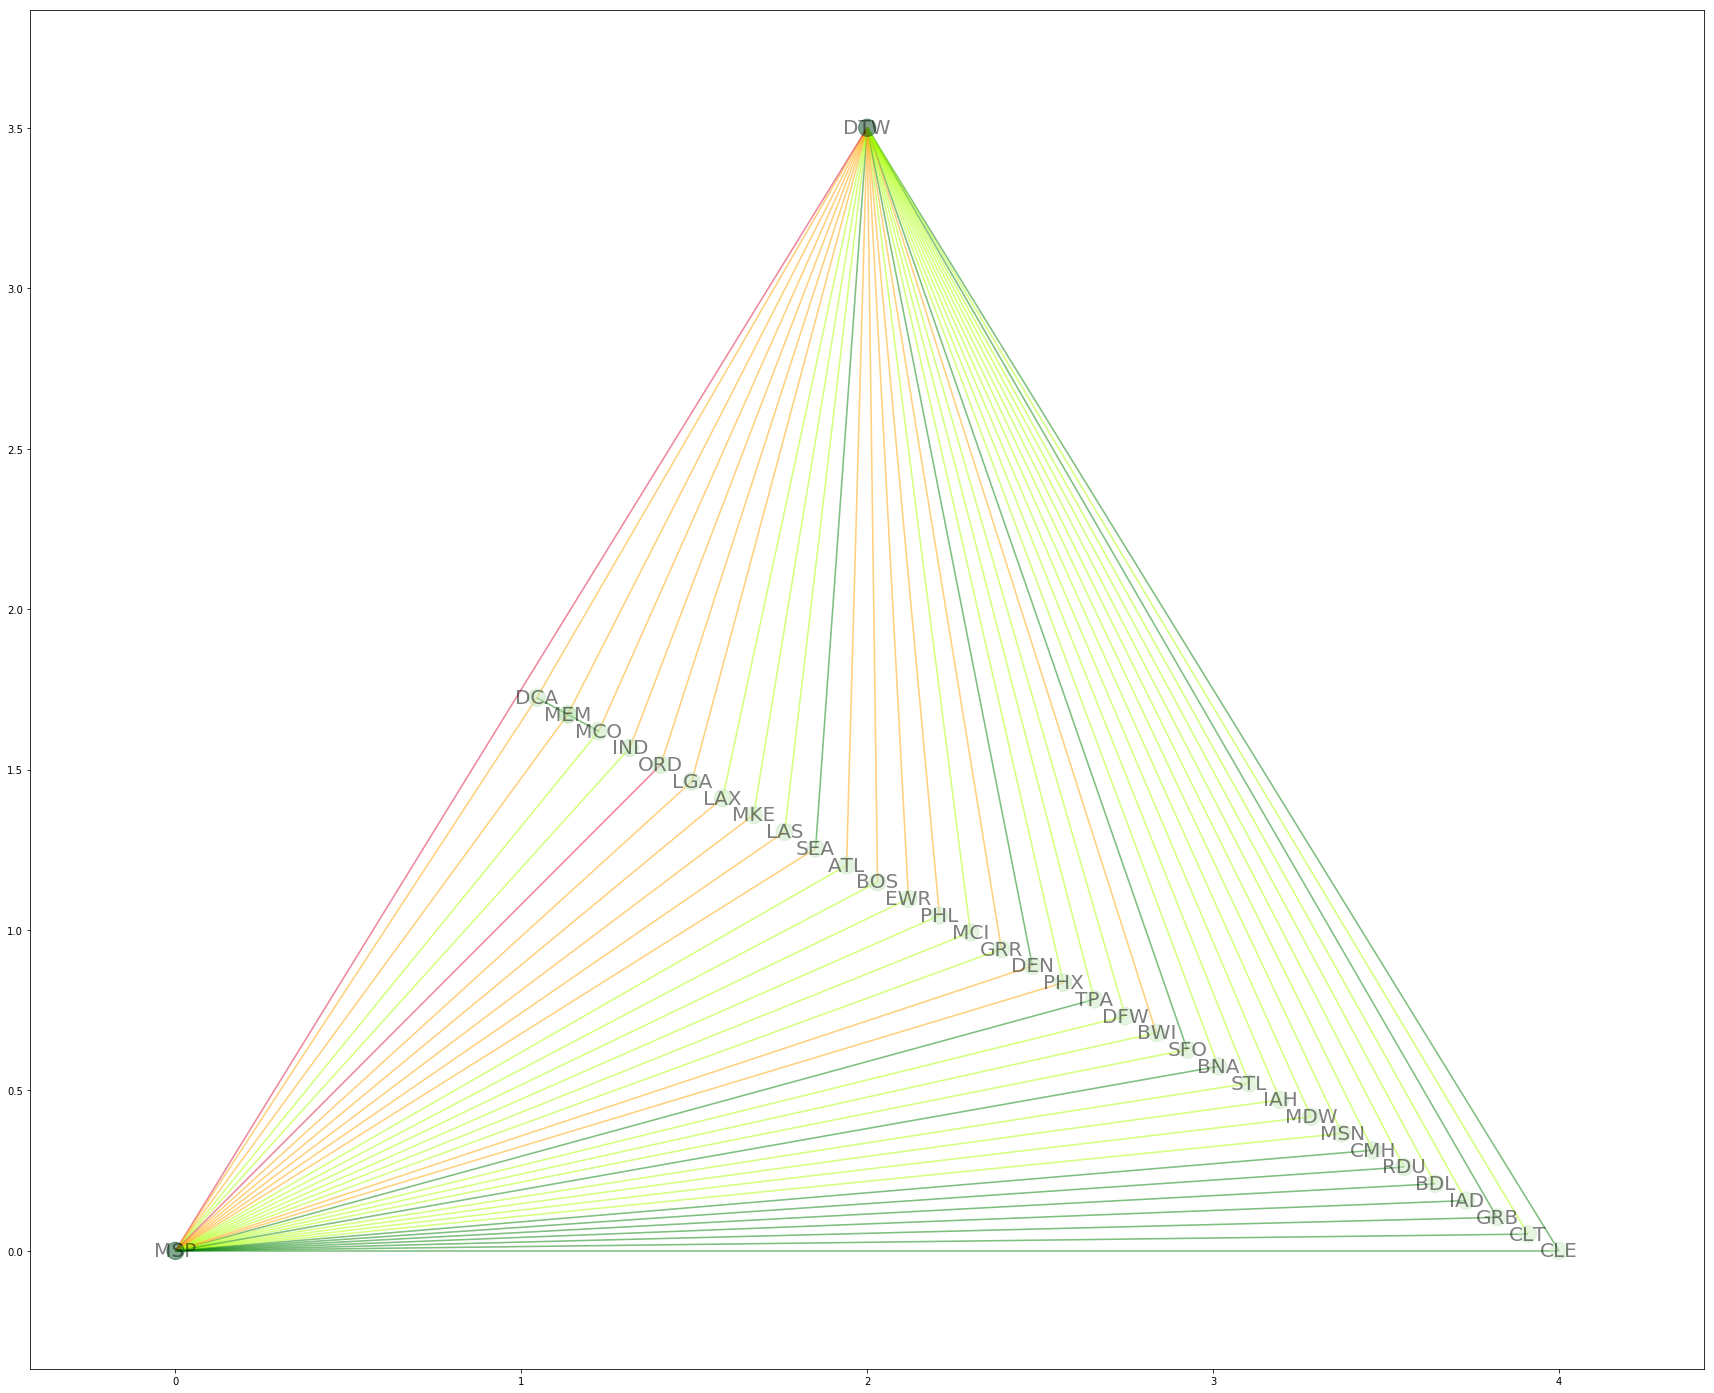

In [74]:
list_of_cities = list(set_of_cities)
list_from = []
list_to = []
list_capacity = []
for i in range(len(set_of_cities)):
    for j in range(i + 1, len(set_of_cities)):
        if (graph.incidence_matrix[list_of_cities[i]][list_of_cities[j]] >= 10000):
            list_from.append(list_of_cities[i])
            list_to.append(list_of_cities[j])
            list_capacity.append(graph.incidence_matrix[list_of_cities[i]][list_of_cities[j]])
draw_df = pd.DataFrame({"from":list_from, "to":list_to, "weight":list_capacity})
fig = plt.figure(figsize=(30,25))
NW = nx.from_pandas_dataframe(draw_df, "from", "to", create_using=nx.Graph())
dic = {}
colors = pd.Series("", index=list(NW.edges()))
for edge in list(NW.edges()):
    if (graph.incidence_matrix[edge[0]][edge[1]] > 25000):
        if (graph.incidence_matrix[edge[0]][edge[1]] > 40000):
            colors[edge] = "crimson"
        else:
            colors[edge] = "orange"
    else:
        if (graph.incidence_matrix[edge[0]][edge[1]] > 15000):
            colors[edge] = "#aaff00"
        else:
            colors[edge] = "green"
for i in set_of_cities:
    dic[i] = (X[i], Y[i])
nx.draw_networkx(NW, pos=dic, with_labels=True, node_size=300,
                 edge_color=colors, node_color=graph.incidence_matrix.loc[list(NW.nodes),
                                                                                     list(NW.nodes)].sum(),
                 cmap=plt.cm.Greens, vmin=-200000, node_shape="o", alpha=0.5, width=1.6,
                 font_size=20)

In [ ]:
target_matrix.sum()

In [786]:
face_list = []
for city in target_matrix.columns:
    face_list.append([])
face_list = pd.Series(face_list, index = target_matrix.columns)
for face in inner_faces.keys():
    for city in face:
        face_list[city].append(face)
print(face_list)
for iterator in range(4000):
    if (iterator % 10 == 9):
        print(iterator)
    for city in target_matrixx.columns:
        min_dist = 3
        min_rel_area = 1.1
        max_rel_area = 0.9
        min_face = []
        max_face = []
        for face in face_list[city]:
            abs_area = area(list(face), X, Y)
            dist = 1
            if (city == list(face)[0]):
                dist = np.sqrt((X[list(face)[1]] - X[list(face)[2]])**2 + (Y[list(face)[1]] - Y[list(face)[2]])**2)
            if (city == list(face)[1]):
                dist = np.sqrt((X[list(face)[0]] - X[list(face)[2]])**2 + (Y[list(face)[0]] - Y[list(face)[2]])**2)
            if (city == list(face)[2]):
                dist = np.sqrt((X[list(face)[1]] - X[list(face)[0]])**2 + (Y[list(face)[1]] - Y[list(face)[0]])**2)
            height = 2 * abs_area / dist
            if (height < min_dist):
                min_dist = height
        for face in face_list[city]:
            abs_area = area(list(face), X, Y)
            rel_area = abs_area * 0.5 * number_of_faces / inner_faces[face]
            if (X[list(face)[0]] == city):
                p_1 = (X[list(face)[0]] - X[list(face)[1]]) * (X[list(face)[2]] - X[list(face)[1]])
                p_2 = (Y[list(face)[0]] - Y[list(face)[1]]) * (Y[list(face)[2]] - Y[list(face)[1]])
                p_3 = (X[list(face)[2]] - X[list(face)[1]]) * (X[list(face)[2]] - X[list(face)[1]])
                p_4 = (Y[list(face)[2]] - Y[list(face)[1]]) * (Y[list(face)[2]] - Y[list(face)[1]])
                mult = (p_1 + p_2) / (p_3 + p_4)
                X_proj = X[list(face)[1]] * (1 - mult) + X[list(max_face)[2]] * mult
                Y_proj = Y[list(face)[1]] * (1 - mult) + Y[list(max_face)[2]] * mult
            else:
                if (X[list(face)[1]] == city):
                    p_1 = (X[list(face)[1]] - X[list(face)[2]]) * (X[list(face)[0]] - X[list(face)[2]])
                    p_2 = (Y[list(face)[1]] - Y[list(face)[2]]) * (Y[list(face)[0]] - Y[list(face)[2]])
                    p_3 = (X[list(face)[0]] - X[list(face)[2]]) * (X[list(face)[0]] - X[list(face)[2]])
                    p_4 = (Y[list(face)[0]] - Y[list(face)[2]]) * (Y[list(face)[0]] - Y[list(face)[2]])
                    mult = (p_1 + p_2) / (p_3 + p_4)
                    X_proj = X[list(face)[2]] * (1 - mult) + X[list(face)[0]] * mult
                    Y_proj = Y[list(face)[2]] * (1 - mult) + Y[list(face)[0]] * mult
                else:
                    p_1 = (X[list(face)[2]] - X[list(face)[0]]) * (X[list(face)[1]] - X[list(face)[0]])
                    p_2 = (Y[list(face)[2]] - Y[list(face)[0]]) * (Y[list(face)[1]] - Y[list(face)[0]])
                    p_3 = (X[list(face)[1]] - X[list(face)[0]]) * (X[list(face)[1]] - X[list(face)[0]])
                    p_4 = (Y[list(face)[1]] - Y[list(face)[0]]) * (Y[list(face)[1]] - Y[list(face)[0]])
                    mult = (p_1 + p_2) / (p_3 + p_4)
                    X_proj = X[list(face)[0]] * (1 - mult) + X[list(face)[1]] * mult
                    Y_proj = Y[list(face)[0]] * (1 - mult) + Y[list(face)[1]] * mult
            X_target = (X[city] + X_proj * (rel_area - 1))/ rel_area 
            Y_target = (Y[city] + Y_proj * (rel_area - 1))/ rel_area
            if ((iterator % 10 == 9)):
                print(X[city], Y[city], X_target, Y_target, max_face)
            distance = np.sqrt((X[city] - X_target)**2 + (Y[city] - Y_target)**2)
            if (min_dist < distance * 0.01):
                X[city] = X[city] + (X_target - X[city]) * (min_dist / distance) * 0.1
                Y[city] = Y[city] + (Y_target - Y[city]) * (min_dist / distance) * 0.1
            else:
                X[city] = 0.999 * X[city] + 0.001 * X_target
                Y[city] = 0.999 * Y[city] + 0.001 * Y_target
#        if (min_rel_area < 0.55):
#            the_area = area(list(min_face), X, Y)
#            X_in = (X[list(min_face)[0]] + X[list(min_face)[1]] + X[list(min_face)[2]]) / 3
#            Y_in = (Y[list(min_face)[0]] + Y[list(min_face)[1]] + Y[list(min_face)[2]]) / 3
#            distance = np.sqrt((X[city] - X_in)**2 + (Y[city] - Y_in)**2)
#            if (distance < min_dist):
#                X[city] = X[city] + (X[city] - X_in) * 0.2
#                Y[city] = Y[city] + (Y[city] - Y_in) * 0.2
#            else:
#                X[city] = X[city] + (X[city] - X_in) * min_dist / distance * 0.2
#                Y[city] = Y[city] + (Y[city] - Y_in) * min_dist / distance * 0.2
#        else:
        

ORIGIN
AUS    [(AUS, HOU, PHX), (AUS, HOU, DAL), (AUS, ELP, ...
DAL    [(AUS, HOU, DAL), (AUS, ELP, DAL), (ABQ, DAL, ...
MDW    [(LAS, MDW, MCI), (LAS, MDW, PHX), (HOU, MDW, ...
LAS    [(LAS, ABQ, MCI), (LAS, MDW, MCI), (LAS, ABQ, ...
ABQ    [(ABQ, ELP, PHX), (ABQ, DAL, MCI), (LAS, ABQ, ...
HOU    [(AUS, HOU, PHX), (AUS, HOU, DAL), (HOU, DAL, ...
PHX    [(AUS, HOU, PHX), (AUS, ELP, PHX), (ABQ, ELP, ...
MCI    [(ABQ, DAL, MCI), (LAS, ABQ, MCI), (LAS, MDW, ...
ELP    [(AUS, ELP, PHX), (AUS, ELP, DAL), (ABQ, ELP, ...
dtype: object
9
1.01487569444 0.159553482094 1.74572742813 0.27445419323 []
1.01560654617 0.159668382805 0.957552023787 0.150541352521 []
1.01554849165 0.159659255775 1.35941478418 0.298165789066 []
1.01589235794 0.159797762308 1.03550632057 0.167698106212 []
0.895169634992 0.330296150546 0.913652674709 0.21279630095 []
0.895188118031 0.330178650697 0.861873975251 0.412886740305 []
0.895154803888 0.330261358786 1.002504041 0.382211835309 []
0.895262153126 0.330313309263 0.929

1.1937532483 1.09993995994 1.20134989487 0.93468811238 []
1.19376084495 1.09977470809 1.20842867772 1.03162701785 []
1.19377551278 1.0997065604 1.20710747948 0.809576096983 []
1.19378884475 1.09941642994 0.488702918866 4.37612103673 []
1.22244383095 0.47582618165 1.27770585058 0.146712752795 []
1.22249909297 0.475497068222 1.14423415233 0.440859370898 []
1.22242082803 0.475462430524 1.21165977141 0.705535348546 []
1.22241006697 0.475692503442 1.21639019583 0.473023933304 []
1.2224040471 0.475689834872 1.22859558052 0.343286229436 []
0.90089336203 0.824440553011 1.00270893102 0.594544749917 []
0.900995177599 0.824210657208 1.09378640121 0.833226071093 []
0.901187968823 0.824219672622 1.0131994023 0.848322451102 []
0.901299980256 0.8242437754 0.832297712541 1.01094969639 []
0.901230977988 0.824430481321 0.650369265319 0.949861337656 []
1.2606599841 0.248229555895 1.43108639892 0.316107291102 []
1.26083041051 0.24829743363 1.44409331374 0.32128770824 []
1.26101367341 0.248370423905 1.2953

0.898550981407 0.339834398623 0.822898403673 0.564325189235 []
0.89847532883 0.340058889414 0.980441671596 0.366509544696 []
0.898557295172 0.340085340069 0.915967565973 0.345703659195 []
0.898574705443 0.340090958388 0.828600529647 0.313607256627 []
1.07762049462 1.60827015084 1.1490820458 1.03133737031 []
1.07769195617 1.60769321806 0.989931925351 2.05083890483 []
1.07760419614 1.60813636375 1.20014734079 0.619030500765 []
1.07772673928 1.60714725788 -1.30106809055 13.6302435623 []
1.22178392236 0.444391031957 1.33365119919 0.171550095401 []
1.22189578964 0.444118191021 1.12236705801 0.412094008101 []
1.22179626091 0.444086166838 1.18057935089 0.775078978492 []
1.221755044 0.44441715965 1.2225792023 0.44468321703 []
1.22175586816 0.444417425707 1.26067116773 0.131909553905 []
0.900362142419 0.834554431185 0.98108894169 0.583708026082 []
0.900442869219 0.83430358478 1.11014879957 0.860417388107 []
0.900652575149 0.834329698583 0.688507234071 0.792356297743 []
0.900440429808 0.83428772

1.00611319624 1.95805024915 1.20130688272 0.552875625618 []
1.00629754752 1.95672312759 -17.1859587916 126.974272169 []
1.21930979966 0.423274906995 1.32324472451 0.268080490789 []
1.21941373459 0.423119712579 1.00177033671 0.375161505707 []
1.21919609119 0.423071754372 1.1636071075 0.823499891698 []
1.2191405022 0.42347218251 1.21815484743 0.423253742295 []
1.21913951655 0.42347196407 1.26864129754 0.066890512635 []
0.730581552485 0.811353966498 0.789566689894 0.54383670035 []
0.730640537623 0.811086449232 1.11225630144 0.864063573777 []
0.731022153386 0.811139426357 -3.75049148971 0.159000221837 []
0.726540639743 0.810487287152 0.664543148987 0.968168422456 []
0.726478642253 0.810644968288 0.609904592959 0.868931992935 []
1.34328714041 0.238153389393 1.16164400021 0.190806347338 []
1.34310549727 0.238106042351 1.87796266125 0.37752173737 []
1.34364035443 0.238245458046 1.41756924741 0.128425593539 []
1.34371428333 0.238135638181 1.34434776258 0.235262598541 []
279
1.21877112478 0.205

1.24344566174 0.209972872787 1.82739228446 0.308580277756 []
1.24402960837 0.210071480192 1.00617561602 0.169906567792 []
1.24379175437 0.210031315279 0.929976278765 0.137305599675 []
1.2434779389 0.209958589564 1.67947384944 0.3109992235 []
0.88460975367 0.36005020161 0.90993591348 0.210075820178 []
0.88463507983 0.359900227229 0.811441369255 0.675735126962 []
0.884561886119 0.360216062128 0.692183188465 0.326139366015 []
0.884369507421 0.360181985432 0.859588606619 0.355792459792 []
0.884344726521 0.360177595907 0.936812231589 0.381546660788 []
1.00441950094 1.96678768913 1.13940216691 0.926764443001 []
1.00455448361 1.96574766588 -0.11472727336 10.3833897089 []
1.00441081142 1.96682816331 1.1901294951 0.535915186711 []
1.00455110712 1.96574722228 -19.3577398221 155.217473863 []
1.20555387235 0.417074469545 1.23426067324 0.385554798256 []
1.20558257915 0.417042949874 0.837585555465 0.351914154395 []
1.20521458213 0.416977821078 1.15198330496 0.827822430868 []
1.20516135085 0.41738866

1.29164085344 0.219724693012 0.989281588974 0.168289500027 []
1.29133849418 0.219673257819 1.07096520217 0.132983762772 []
1.29111812089 0.219586568324 1.6584105631 0.364070484954 []
0.85790471295 0.376381694454 0.887020237793 0.205253056728 []
0.857933828475 0.376210565817 0.729745617303 0.702077708977 []
0.857805640264 0.37653643296 0.678218323924 0.342796941776 []
0.857626052947 0.376502693469 0.791940468874 0.364162188416 []
0.857560367363 0.376490352964 0.936475248852 0.411135950774 []
1.00304770479 1.96884096789 1.10193924837 0.874013638791 []
1.00314659633 1.96774614056 0.125656417519 10.9623682342 []
1.00303776316 1.96886172368 1.13616712159 0.495073403238 []
1.00313860317 1.96774538966 -13.3146609595 149.108055955 []
1.14205087078 0.429938252445 0.534181932116 0.846931533633 []
1.14144300184 0.430355245727 0.834307755148 0.372099609521 []
1.14113586659 0.43029699009 1.10989731156 0.77830923475 []
1.14110462804 0.430645002335 1.1142090264 0.425510018168 []
1.14107773244 0.43063

0.835497326615 0.382327378283 0.749226579991 0.340107978841 []
0.835411055868 0.382285158883 0.791203462802 0.360650733507 []
0.835366848275 0.382263524458 0.925422751096 0.423473068362 []
1.00108627046 1.9710765266 1.02203499464 0.828262265952 []
1.00110721919 1.96993371234 0.58020991153 13.3993053031 []
1.00106319276 1.97112924002 1.02865064209 0.467366910363 []
1.00108513663 1.96993310322 -3.83744687291 136.035670453 []
1.02847815801 0.476768832938 -1.56804737084 1.91142237834 []
1.02621900485 0.478017078739 0.873063399547 0.401173292464 []
1.02606584925 0.477940234952 1.02201718157 0.719526601733 []
1.02606180058 0.478181821319 1.00643116063 0.468307318533 []
1.02604216994 0.478171946816 1.03230606217 0.104105870231 []
0.372711194872 0.727505106833 0.456356604005 0.560560074442 []
0.372794840281 0.727338161801 0.974708434451 0.7374174556 []
0.373396753875 0.727348241095 -6.23733795992 0.488761916568 []
0.372595989968 0.727319340931 0.297244096212 0.891987089672 []
0.372520638075 0.

0.825382422666 0.362225309656 0.824586659205 0.360286362281 []
0.825381626902 0.362223370709 0.913467517156 0.400880359234 []
0.998133033648 1.97298885472 0.911283513366 0.803428752225 []
0.998056810275 1.97196239175 2.14296945373 18.4915084548 []
0.998127976037 1.97298921776 0.887410804343 0.481944822965 []
0.998051756237 1.97196275453 8.67204333518 112.408649198 []
0.890259079898 0.520302967737 -22.6353520515 11.732811756 []
0.889912111346 0.520468335936 0.889437976586 0.519304333484 []
0.889911637211 0.520467171933 0.901209231832 0.672114767323 []
0.889922934806 0.520618819529 0.89003607327 0.520896792354 []
0.889923047944 0.520619097502 0.864301183695 0.176696558929 []
0.37081635894 0.726782559855 0.507296869322 0.671134486613 []
0.37095283945 0.726726911782 0.854288877185 0.690718889752 []
0.371436175488 0.72669090376 -6.84787995732 1.22834459324 []
0.370773653812 0.726736940869 0.296774355003 0.895355717511 []
0.370699654513 0.726905559645 0.505253031954 0.659628870925 []
1.25639

0.830589790662 0.348174621277 0.910220490796 0.381554984451 []
0.997682237855 1.97302437426 0.896056011626 0.810082896319 []
0.997596260577 1.97204050871 2.49286103237 19.3644591519 []
0.997680855976 1.97302449404 0.867922370124 0.488140201584 []
0.997594879637 1.97204062841 10.1472900822 108.33666673 []
0.871241026241 0.526117065359 -57.483070316 27.9099126058 []
0.871096679226 0.526184802755 0.876739095838 0.551024955469 []
0.871102321643 0.526209642908 0.884019308061 0.673854629353 []
0.871115238629 0.526357287894 0.870254806472 0.522567393534 []
0.871114378197 0.526353498 0.841653445323 0.189607703098 []
0.374150379529 0.733926001907 0.516661033998 0.701553592285 []
0.374292890183 0.733893629497 0.837225295592 0.693392988576 []
0.374755822589 0.733853128856 -6.8597669556 1.35618106608 []
0.374115329293 0.733908225354 0.30878236245 0.889763626458 []
0.374049996326 0.734064080756 0.50878650876 0.666695824538 []
1.24348574345 0.351434629862 1.18234138991 0.425117423733 []
1.2434245990

0.837482314494 0.339525850381 0.908871938081 0.368468100548 []
0.997389065406 1.97305138086 0.883809274571 0.818944780741 []
0.997295006451 1.97209562931 2.7427217783 19.9776970358 []
0.997387668311 1.97305151732 0.851948246633 0.495198207985 []
0.997293610285 1.97209576568 11.061918604 105.743423515 []
0.85589319339 0.535283987713 -56.1581640132 27.3952377135 []
0.855746986573 0.535352867363 0.85991683997 0.580229280895 []
0.855751156426 0.535397743777 0.869805292042 0.678052875782 []
0.855765210562 0.535540398909 0.854788039214 0.525024436397 []
0.855764233391 0.535529882947 0.822923095493 0.202178979211 []
0.378071511452 0.742148507321 0.515398697957 0.729388329224 []
0.378208838639 0.742135747143 0.822990202994 0.698316678535 []
0.378653620003 0.742091928074 -6.86606834968 1.44474661497 []
0.378030689264 0.742152345189 0.320516847336 0.884017317768 []
0.377973175422 0.742294210162 0.512863196342 0.674849199702 []
1.22680289403 0.360544320276 1.11413341428 0.473326755652 []
1.226724

KeyboardInterrupt: 